### Libraries

In [1]:
#Packages necessary to run Facebook prophet 
#conda install libpython m2w64-toolchain -c msys2
#conda install numpy cython -c conda-forge
#conda install matplotlib scipy pandas -c conda-forge
#conda install pystan -c conda-forge
#conda install -c anaconda ephem
#!conda install -c conda-forge fbprophet -y
#!pip install --upgrade plotly

In [1]:
import pandas as pd#data structures and operations for manipulating numerical tables and time series.
import pandas_datareader.data as data#Up-to-date remote data access for pandas.
import datetime as dt#supplies classes for manipulating dates and times
from datetime import timedelta
import matplotlib.pyplot as plt#plotting library for the Python.
import seaborn as sns;# visualizacion
import numpy as np
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from itertools import product
from fbprophet import Prophet

In [3]:
#!pip install pandas-datareader
#!pip install seaborn
#!conda install -c plotly plotly
#!pip install pmdarima


### Contents

### I.- Describe Data :

This is research about 2 companies of renewable energy in the stock market. The problematic here is a forecasting, that consists of predicting the values in the future of these companies, we are working with time series.


#### A.- EDP Renováveis (EDPR.LS)

In [4]:
# We define the ticket from the companies that we are interested in research.

ticker = ['EDPR.LS']

# We would like all available data from 01-01-2016 until today
start_date = '2016-01-01'

today = dt.date.today()
yesterday = today - timedelta(days=1)
end_date = yesterday

# User pandas_reader.data.DataReader to load the desired data.
EDPR= data.DataReader('EDPR.LS', 'yahoo', start_date, end_date )
EDPR.head()

High    Low   Open  Close    Volume  Adj Close
Date                                                       
2016-01-04  7.267  7.120  7.133  7.267  628745.0   6.939563
2016-01-05  7.344  7.192  7.250  7.240  623709.0   6.913780
2016-01-06  7.250  7.136  7.240  7.238  345564.0   6.911870
2016-01-07  7.240  7.078  7.125  7.233  684252.0   6.907095
2016-01-08  7.299  7.171  7.233  7.194  447045.0   6.869852

In [5]:
EDPR.shape

(1620, 6)

In [6]:
EDPR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1620 entries, 2016-01-04 to 2022-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1620 non-null   float64
 1   Low        1620 non-null   float64
 2   Open       1620 non-null   float64
 3   Close      1620 non-null   float64
 4   Volume     1620 non-null   float64
 5   Adj Close  1620 non-null   float64
dtypes: float64(6)
memory usage: 88.6 KB


In [7]:
df_EDPR= EDPR.copy()
# ADD Frecuency information
df_EDPR.index = pd.DatetimeIndex(df_EDPR.index).to_period('D')

df_EDPR.head(2)

High    Low   Open  Close    Volume  Adj Close
Date                                                       
2016-01-04  7.267  7.120  7.133  7.267  628745.0   6.939563
2016-01-05  7.344  7.192  7.250  7.240  623709.0   6.913780

In [8]:
df_EDPR.to_csv("EDPR.csv")# reserve and use in modelling

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [9]:
VWS= data.DataReader('VWS.CO', 'yahoo', start_date, end_date)
VWS.head()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2016-01-04  95.959999  94.440002  95.800003  95.040001  5363530.0  87.107880
2016-01-05  95.959999  94.440002  95.800003  95.040001    48610.0  87.107880
2016-01-06  95.360001  92.620003  94.800003  93.940002  4289335.0  86.099701
2016-01-07  92.379997  90.040001  92.000000  91.860001  8454065.0  84.193291
2016-01-08  93.339996  89.800003  91.680000  89.800003  7042265.0  82.305237

In [10]:
VWS.shape

(1582, 6)

In [11]:
VWS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1582 entries, 2016-01-04 to 2022-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1582 non-null   float64
 1   Low        1582 non-null   float64
 2   Open       1582 non-null   float64
 3   Close      1582 non-null   float64
 4   Volume     1582 non-null   float64
 5   Adj Close  1582 non-null   float64
dtypes: float64(6)
memory usage: 86.5 KB


In [12]:
df_VWS= VWS.copy()
# ADD Frecuency information
df_VWS.index = pd.DatetimeIndex(df_VWS.index).to_period('D')
df_VWS.head(2)

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2016-01-04  95.959999  94.440002  95.800003  95.040001  5363530.0   87.10788
2016-01-05  95.959999  94.440002  95.800003  95.040001    48610.0   87.10788

In [13]:
df_VWS.to_csv("VWS.csv")# reserve and use in modelling

### II.- Exploratory Data Analysis (EDA) 

#### A.- EDP Renováveis (EDPR.LS)

In [14]:
EDPR_T= EDPR.describe().transpose()
EDPR_T['Bool Mean'] = EDPR_T['mean'].gt(EDPR_T['50%'])#is the 'mean' greater than the MEDIAN?
#the distribution is positively skewed. 
EDPR_T

count           mean            std           min            25%  \
High       1620.0      11.496259       5.718301      5.759000       7.049000   
Low        1620.0      11.200638       5.477552      5.500000       6.957000   
Open       1620.0      11.346446       5.607898      5.500000       6.994000   
Close      1620.0      11.359249       5.601658      5.700000       7.000000   
Volume     1620.0  482348.014198  853394.268391  21033.000000  150302.500000   
Adj Close  1620.0      11.179581       5.650846      5.484237       6.771429   

                    50%            75%           max  Bool Mean  
High            8.79750      14.785000  2.640000e+01       True  
Low             8.62750      14.340000  2.535000e+01       True  
Open            8.70000      14.550000  2.580000e+01       True  
Close           8.72750      14.630000  2.580000e+01       True  
Volume     304966.50000  602294.250000  2.394718e+07       True  
Adj Close       8.52594      14.512365  2.559255e+01       True

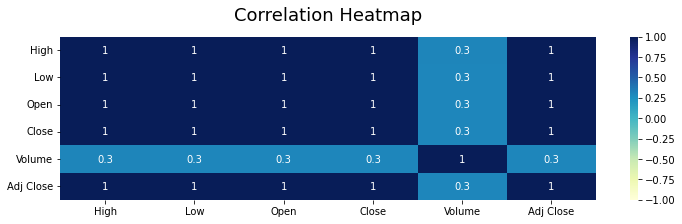

In [15]:
plt.figure(figsize = (12, 3))
heatmap= sns.heatmap(EDPR.corr(),vmin=-1, vmax=1, annot = True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

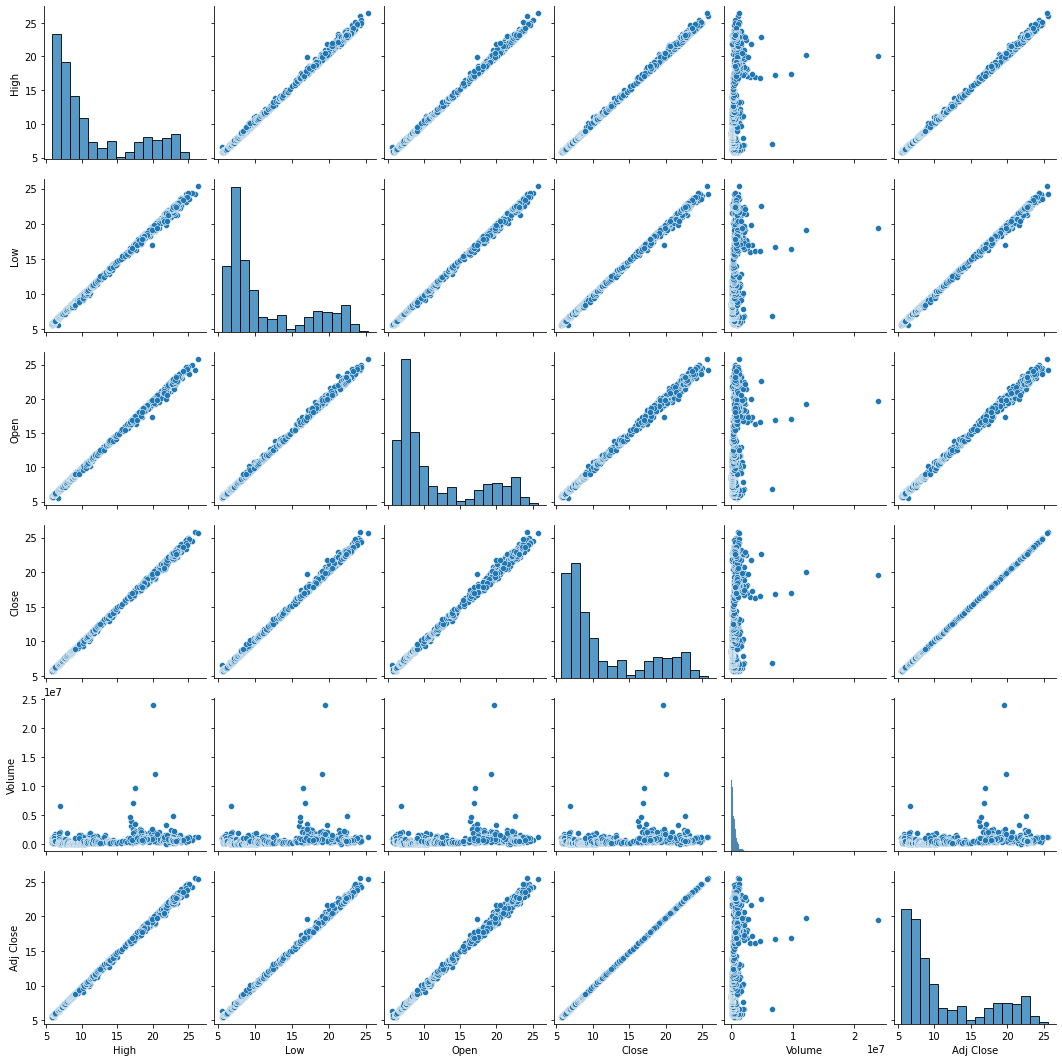

In [16]:
sns.pairplot(EDPR)

<AxesSubplot:>

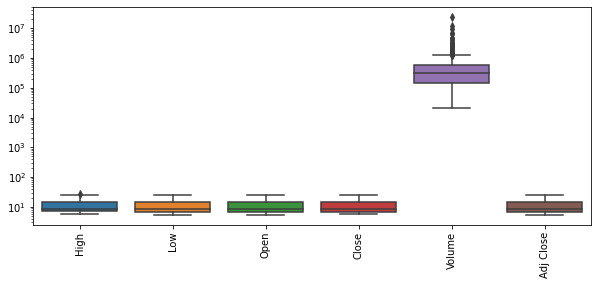

In [17]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=EDPR)

In [18]:
# We selected the main column  for us
close_EDPR= EDPR['Close']

# freq='B' stands for only weekdays
weekdays_EDPR= pd.date_range(start=start_date, end=end_date, freq='B')

 # We need reindex close using all weekdays as the new index.
close_EDPR= close_EDPR.reindex(weekdays_EDPR)

#We filling the Missing values (NaN) with 'forward fill'
close_EDPR = close_EDPR.fillna(method='ffill')
close_EDPR = close_EDPR.dropna()# delete NaNs if there are more.
#we passed the information into Dataframe and rename the columns
close_EDPR = pd.DataFrame(close_EDPR).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_EDPR.head()

Close
2016-01-04  7.267
2016-01-05  7.240
2016-01-06  7.238
2016-01-07  7.233
2016-01-08  7.194

In [19]:
close_EDPR.tail()

Close
2022-04-25  23.000000
2022-04-26  22.760000
2022-04-27  22.790001
2022-04-28  22.870001
2022-04-29  22.639999

In [20]:
close_EDPR.describe()

Close
count  1650.000000
mean     11.350495
std       5.600989
min       5.700000
25%       7.000000
50%       8.727500
75%      14.515000
max      25.799999

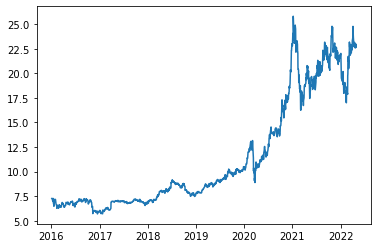

In [21]:
plt.plot(close_EDPR["Close"],label='EDPR Close Price history')

In [22]:
EDPR_df = close_EDPR

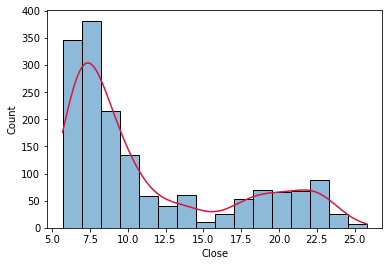

In [23]:
ax= sns.histplot(EDPR_df['Close'], kde=True);
ax.lines[0].set_color('crimson')

In [24]:
EDPR_df.to_csv("EDPR_df.csv")

In [25]:
EDPR_df= pd.read_csv('EDPR_df.csv')#We decided works with a CSV for modeling 
EDPR_df.head()

Unnamed: 0  Close
0  2016-01-04  7.267
1  2016-01-05  7.240
2  2016-01-06  7.238
3  2016-01-07  7.233
4  2016-01-08  7.194

In [26]:
#Renaming column Unnamed: 0
list(EDPR_df.columns)

EDPR_df = EDPR_df.rename(columns={'Unnamed: 0': 'Date'})

In [27]:
EDPR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1650 non-null   object 
 1   Close   1650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.9+ KB


In [28]:
EDPR_df= EDPR_df[['Date', 'Close']]

In [29]:
#we define date and we reindex the dataframe
EDPR_df.index = EDPR_df["Date"]

In [30]:
EDPR_df= EDPR_df.sort_index(ascending=True,axis=0)
df_1= pd.DataFrame(index=range(0,len(EDPR_df)),columns=['Date','Close'])
for i in range(0,len(df_1)):
    df_1["Close"][i]=EDPR_df["Close"][i]
    df_1["Date"][i]=EDPR_df['Date'][i]

EDPR_df = df_1
#convert  the Date data to datatime Type
EDPR_df["Date"] = pd.to_datetime(EDPR_df.Date, format="%Y/%m/%d")
EDPR_df.head()

Date  Close
0 2016-01-04  7.267
1 2016-01-05   7.24
2 2016-01-06  7.238
3 2016-01-07  7.233
4 2016-01-08  7.194

In [31]:
EDPR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1650 non-null   datetime64[ns]
 1   Close   1650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 25.9+ KB


#### B.- Vestas Wind Systems A/S (VWS.CO)

In [32]:
VWS_T= VWS.describe().transpose()
VWS_T['Bool Mean'] = VWS_T['mean'].gt(VWS_T['50%'])#is the 'mean' greater than the MEDIAN?
#the distribution is positively skewed. 
VWS_T

count          mean           std           min           25%  \
High       1582.0  1.402560e+02  6.059011e+01     73.279999  9.336500e+01   
Low        1582.0  1.359151e+02  5.773771e+01     71.480003  9.104500e+01   
Open       1582.0  1.381821e+02  5.932565e+01     71.580002  9.224000e+01   
Close      1582.0  1.381362e+02  5.924400e+01     72.160004  9.240000e+01   
Volume     1582.0  4.251436e+06  3.009247e+06  48610.000000  2.598352e+06   
Adj Close  1582.0  1.346338e+02  6.078075e+01     68.264664  8.603172e+01   

                    50%           75%           max  Bool Mean  
High       1.137000e+02  1.865700e+02  3.210000e+02       True  
Low        1.115000e+02  1.809700e+02  3.110000e+02       True  
Open       1.127000e+02  1.843325e+02  3.140000e+02       True  
Close      1.126500e+02  1.835900e+02  3.120000e+02       True  
Volume     3.479235e+06  4.905718e+06  4.817422e+07       True  
Adj Close  1.080215e+02  1.831333e+02  3.093708e+02       True

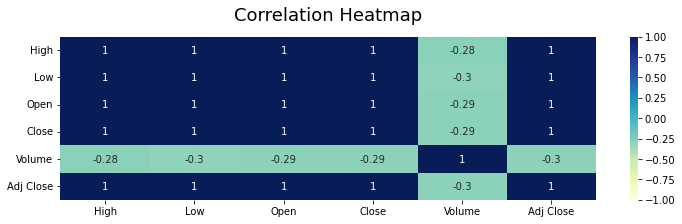

In [33]:
plt.figure(figsize = (12, 3))
heatmap= sns.heatmap(VWS.corr(),vmin=-1, vmax=1, annot = True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

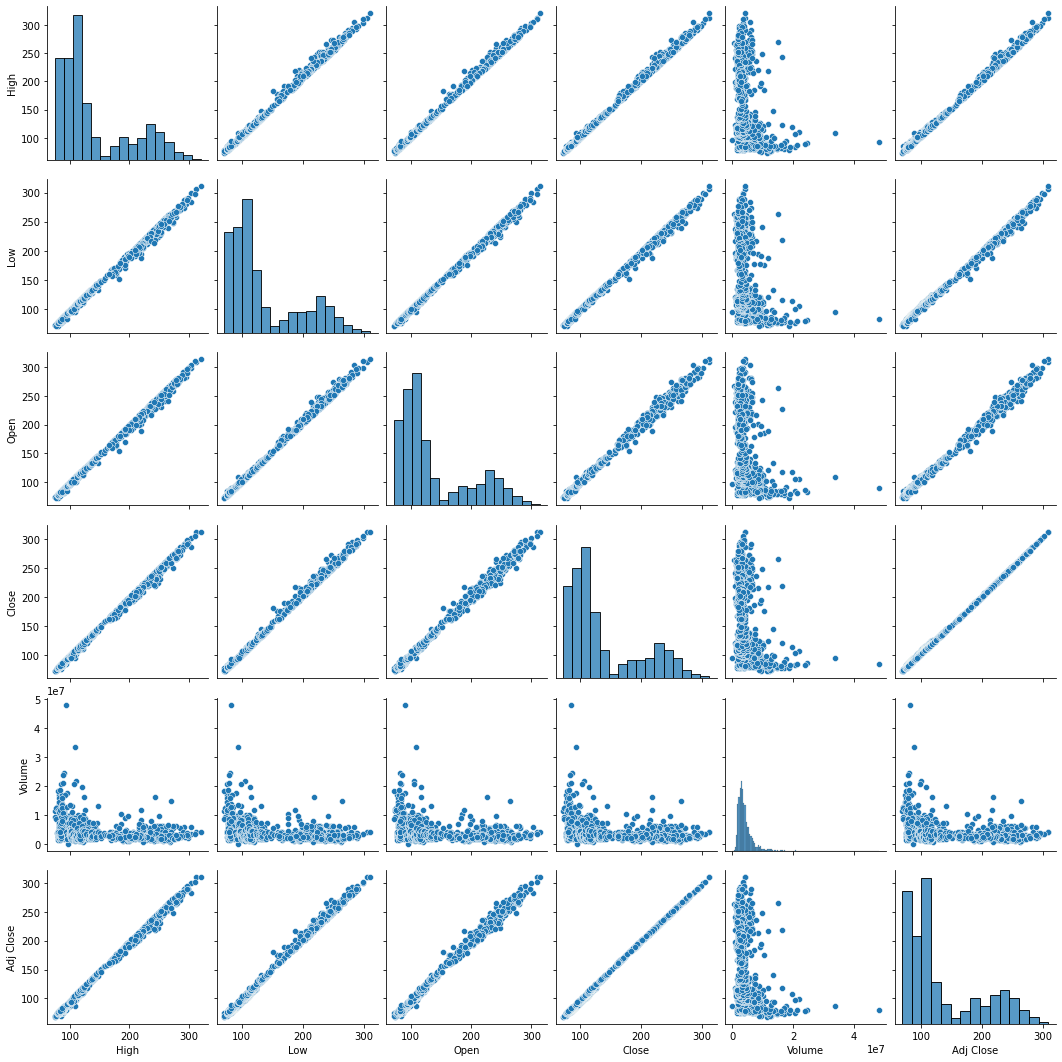

In [34]:
sns.pairplot(VWS)

<AxesSubplot:>

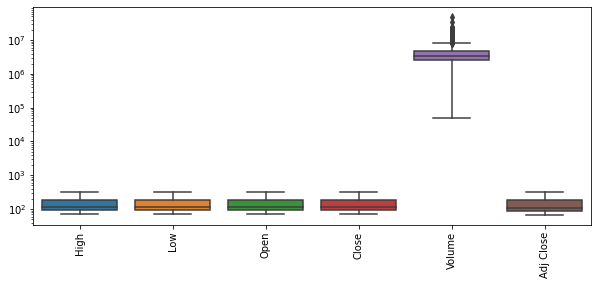

In [35]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=VWS)

In [36]:
# We selected the main column  for us
close_VWS= VWS['Close']

# freq='B' stands for only weekdays
weekdays_VWS= pd.date_range(start=start_date, end=end_date, freq='B')

 # We need to align the existing prices, so we reindex close using all weekdays as the new index.
close_VWS= close_VWS.reindex(weekdays_VWS)

#We filling the Missing values (NaN) with 'forward fill'
close_VWS = close_VWS.fillna(method='ffill')
#we passed the information into Dataframe and rename the columns
close_VWS= pd.DataFrame(close_VWS).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_VWS.head()

Close
2016-01-04  95.040001
2016-01-05  95.040001
2016-01-06  93.940002
2016-01-07  91.860001
2016-01-08  89.800003

In [37]:
close_VWS.tail()

Close
2022-04-25  189.679993
2022-04-26  177.880005
2022-04-27  179.559998
2022-04-28  177.199997
2022-04-29  182.820007

In [38]:
close_VWS.describe()

Close
count  1650.000000
mean    138.154146
std      59.315177
min      72.160004
25%      92.410002
50%     112.820000
75%     183.557499
max     312.000000

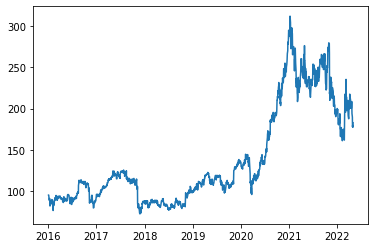

In [39]:
plt.plot(close_VWS["Close"],label='VWS Close Price history')

In [40]:
VWS_df = close_VWS

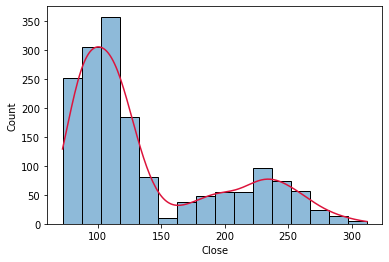

In [41]:
ax= sns.histplot(VWS_df['Close'], kde=True);
ax.lines[0].set_color('crimson')

In [42]:
VWS_df.to_csv("VWS_df.csv")

In [43]:
VWS_df= pd.read_csv('VWS_df.csv')#We decided works with a CSV for modeling 
VWS_df.head()

Unnamed: 0      Close
0  2016-01-04  95.040001
1  2016-01-05  95.040001
2  2016-01-06  93.940002
3  2016-01-07  91.860001
4  2016-01-08  89.800003

In [44]:
#Renaming column Unnamed: 0
list(VWS_df.columns)

VWS_df = VWS_df.rename(columns={'Unnamed: 0': 'Date'})

In [45]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1650 non-null   object 
 1   Close   1650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.9+ KB


In [46]:
VWS_df= VWS_df[['Date', 'Close']]

In [47]:
#we define  the dataframe index value as the data column
VWS_df.index = VWS_df["Date"]

In [48]:
VWS_df= VWS_df.sort_index(ascending=True,axis=0)
df_2 = pd.DataFrame(index=range(0,len(VWS_df)),columns=['Date','Close'])
for i in range(0,len(df_2)):
    df_2["Date"][i]=VWS_df['Date'][i]
    df_2["Close"][i]=VWS_df["Close"][i]

VWS_df = df_2
#convert  the Date data to datatime Type
VWS_df["Date"] = pd.to_datetime(VWS_df.Date, format="%Y/%m/%d")
VWS_df.head()

Date      Close
0 2016-01-04  95.040001
1 2016-01-05  95.040001
2 2016-01-06  93.940002
3 2016-01-07  91.860001
4 2016-01-08  89.800003

In [49]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1650 non-null   datetime64[ns]
 1   Close   1650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 25.9+ KB


In [50]:
VWS_df = VWS_df.rename(columns={'Close': 'VWS'})
Stocks_df = VWS_df

In [51]:
Stocks_df["EDPR"] = EDPR_df["Close"]

In [52]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1650 non-null   datetime64[ns]
 1   VWS     1650 non-null   object        
 2   EDPR    1650 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 38.8+ KB


In [53]:
#we define  the dataframe'd index valu as the data column
Stocks_df.index = Stocks_df["Date"]

In [54]:
Stocks_df= Stocks_df.sort_index(ascending=True,axis=0)
df_3 = pd.DataFrame(index=range(0,len(Stocks_df)),columns=['Date','EDPR', 'VWS'])
for i in range(0,len(df_3)):
    df_3["Date"][i]=Stocks_df['Date'][i]
    df_3["EDPR"][i]=Stocks_df["EDPR"][i]
    df_3["VWS"][i]=Stocks_df["VWS"][i]

Stocks_df = df_3
#convert  the Date data to datatime Type
Stocks_df["Date"] = pd.to_datetime(Stocks_df.Date, format="%Y/%m/%d")
Stocks_df.head()

Date   EDPR        VWS
0 2016-01-04  7.267  95.040001
1 2016-01-05   7.24  95.040001
2 2016-01-06  7.238  93.940002
3 2016-01-07  7.233  91.860001
4 2016-01-08  7.194  89.800003

In [55]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1650 non-null   datetime64[ns]
 1   EDPR    1650 non-null   object        
 2   VWS     1650 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 38.8+ KB


In [56]:
Stocks_df.head()

Date   EDPR        VWS
0 2016-01-04  7.267  95.040001
1 2016-01-05   7.24  95.040001
2 2016-01-06  7.238  93.940002
3 2016-01-07  7.233  91.860001
4 2016-01-08  7.194  89.800003

In [57]:
import plotly.express as px
graphic = px.line(title = 'Stock price history')
for i in Stocks_df.columns[1:]:
  graphic.add_scatter(x = Stocks_df['Date'], y = Stocks_df[i], name = i)
graphic.show()

In [58]:
#Splinting into X/y
X = Stocks_df.drop('Date', axis=1)
y= Stocks_df['Date']
Stocks_normalized = X
Stocks_normalized.head()

EDPR        VWS
0  7.267  95.040001
1   7.24  95.040001
2  7.238  93.940002
3  7.233  91.860001
4  7.194  89.800003

In [59]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(Stocks_normalized)
Stocks = scaler.transform(Stocks_normalized)
DF= pd.DataFrame(Stocks)
DF.rename(columns= {0: 'EDPR', 1: 'VWS'}, inplace=True)
X = DF
X['Date'] = y
X.set_index(X.columns[-1], inplace=True)
X.reset_index(inplace=True)
Stock_norm = X

In [60]:
Stock_norm.head()

Date      EDPR       VWS
0 2016-01-04  0.077960  0.095397
1 2016-01-05  0.076617  0.095397
2 2016-01-06  0.076517  0.090811
3 2016-01-07  0.076269  0.082138
4 2016-01-08  0.074328  0.073549

In [61]:
Stock_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1650 non-null   datetime64[ns]
 1   EDPR    1650 non-null   float64       
 2   VWS     1650 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.8 KB


In [62]:
#Visualizing the graphic with the normalized data

graphic_norm = px.line(title = 'Stock price history')
for i in Stock_norm.columns[1:]:
  graphic_norm.add_scatter(x = Stock_norm['Date'], y = Stock_norm[i], name = i)
graphic_norm.show()

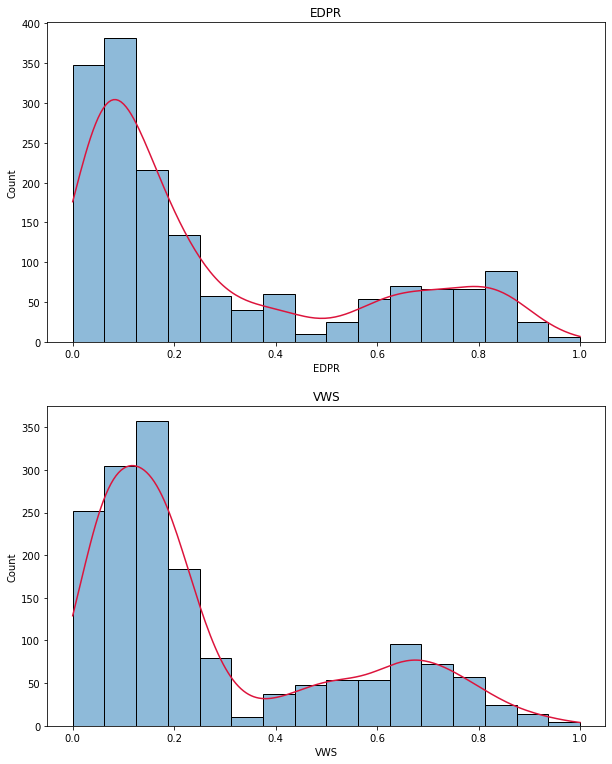

In [63]:
import numpy as np
plt.figure(figsize=(10,20))
i = 1
for i in np.arange(1, len(Stock_norm.columns)):
    plt.subplot(3, 1, i + 1)
    ax=sns.histplot(Stock_norm[Stock_norm.columns[i]], kde = True)
    ax.lines[0].set_color('crimson')
    plt.title(Stock_norm.columns[i])

### II.1- ETS-Decomposition


ETS-Decomposition is a method that allows us to visualize the data after a decomposition of time series into three distinct components: trend, seasonality, and noise.

* Additive decomposition: yt = St + Tt + Rt
* Multiplicative decomposition: yt = St * Tt * Rt

where, 
- S represents the Seasonal variation
- T encodes Trend plus Cycle
- R describes the Residual or the Error component.
Daitan (2019)

In [64]:
# graphs to show seasonal_decompose
def ETS_Decomposition (timeseries):
    decomposition = sm.tsa.seasonal_decompose(timeseries, model='mul',freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

#### A.- EDP Renováveis (EDPR.LS)

In [79]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
EDPR= pd.read_csv('EDPR.csv',index_col='Date',parse_dates=['Date'],date_parser=dateparse, dayfirst=True).fillna(0)#We use the first CSV that we create for modeling
EDPR.asfreq(freq='b')
EDPR.head(2)

High    Low   Open  Close    Volume  Adj Close
Date                                                       
2016-01-04  7.267  7.120  7.133  7.267  628745.0   6.939563
2016-01-05  7.344  7.192  7.250  7.240  623709.0   6.913780

In [80]:
ETS_Decomposition (EDPR['Close'])

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [ ]:

VWS= pd.read_csv('VWS.csv',index_col='Date', parse_dates=['Date'],date_parser=dateparse, dayfirst=True).fillna(0)#We use the first CSV that we create for modeling 
VWS.asfreq(freq='b')
VWS.head(2)

In [ ]:
ETS_Decomposition (VWS['Close'])

### II.2.- Augmented Dickey–Fuller test

The Augmented Dickey-Fuller test helps us to detect if a time series is or not “stationary”. Stationary means that the data has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time. It is ‘stationarize’ the time series as part of the process of fitting a model.Zach (2021) 

In [ ]:
def ADFuller(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(key, value, 'not' if value < result[0] else '', 100-int(key[:-1])))
        

In [ ]:
### Plot for testing Stationarity with mean and standard deviation
def plot_stationarity(timeseries, title):
    
    #Determing rolling statistics
    mean = pd.Series(timeseries).rolling(30).mean()#rolling a month
    std = pd.Series(timeseries).rolling(30).std()#rolling a month
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(mean, label='rolling mean');
    ax.plot(std, label='rolling std');
    ax.legend()

#### A.- EDP Renováveis (EDPR.LS)

In [ ]:
ADFuller(EDPR['Close'])

In [ ]:
plot_stationarity(EDPR['Close'],'EDPR raw data')

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [ ]:
ADFuller(VWS['Close'])

In [ ]:
plot_stationarity(VWS['Close'],'VWS raw data')

### II.3.- Make the Data Stationary

### II.3.1.- Detrending: 

- Removing the underlying trend in the time series.

#### A.- EDP Renováveis (EDPR.LS)

In [ ]:
EDPR['Detrend']=  (EDPR['Close'] - EDPR['Close'].rolling(30).mean())/EDPR['Close'].rolling(30).std().dropna()
plot_stationarity(EDPR['Detrend'],'de-trended EDPR')
ADFuller(EDPR['Detrend'].dropna(inplace=False))

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [ ]:
VWS['Detrend'] =  (VWS['Close'] - VWS['Close'].rolling(30).mean())/VWS['Close'].rolling(30).std().dropna()
plot_stationarity(VWS['Detrend'],'de-trended EDPR')
ADFuller(VWS['Detrend'].dropna(inplace=False))

### II.3.2.-  Differencing

#### A.- EDP Renováveis (EDPR.LS)

- Removing the underlying seasonal or cyclical patterns in the time series. 

In [ ]:
EDPR['Differencing']=  EDPR['Close'] - EDPR['Close'].shift(1).dropna()

In [ ]:
plot_stationarity(EDPR['Differencing'], '1 Day lag differenced EDPR')
ADFuller(EDPR['Differencing'].dropna(inplace=False))

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [ ]:
VWS['Differencing'] =  VWS['Close'] - VWS['Close'].shift(1).dropna()

plot_stationarity(VWS['Differencing'], '1 day lag differenced VWS')
ADFuller(VWS['Differencing'].dropna(inplace=False))

### II.3.3.-  Detrending + Differencing

- Removing the underlying trend and the seasonal or cyclical patterns in the time series.

#### A.- EDP Renováveis (EDPR.LS)

In [ ]:
EDPR['Detrend_Diff']=  EDPR['Detrend']- EDPR['Detrend'].shift(1).dropna()
plot_stationarity(EDPR['Detrend_Diff'],'1 Day differenced de-trended EDPR')
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [ ]:
VWS['Detrend_Diff'] =  VWS['Detrend']- VWS['Detrend'].shift(1)

plot_stationarity(VWS['Detrend_Diff'],'1 Day differenced de-trended EDPR')
ADFuller(VWS['Detrend_Diff'].dropna(inplace=False))

### II.4- Identifying AR and MA orders by ACF and PACF plots

Plotting  ACF and PACF help us to undertand how to choose the best MA(q) and AR(p) values:

- ACF= Describes how well the present value of the series is related with its past values 
- PACF= It finds correlation of the residuals

Blue bars on the plots are the error bands, everything in this area is not statistically significant.  In linear regression models performs best when the predictors are not correlated and are independent of each other. 



In [ ]:
# plot the data with 30 lags, one Month

### Plot for testing Stationarity with mean and standard deviation
def plot_ACF_PACF(timeseries, title):
    plt.figure(figsize=(12,8))
    layout = (2, 2)
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    timeseries.plot(ax = ax_xt)
    ax_xt.set_title(title)
    plot_acf(timeseries[1:], lags = 50, ax = ax_acf) # first value of diff is NaN
    plot_pacf(timeseries[1:], lags = 50, ax = ax_pacf) # first value of diff is NaN
    plt.tight_layout()

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight.

In [ ]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
def plot_QQ(timeseries):
    x = sm.qqplot(timeseries, line= 's')

#### A.- EDP Renováveis (EDPR.LS)

In [ ]:
# Drop the first row of 'Close' column because It has 'NaN' value
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))
plot_ACF_PACF(EDPR['Detrend_Diff'].dropna(inplace=False) , 'EDPR Stationary')

It looks like the ACF is lagged by 7 and that PACF is geometric. If both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modelling.

<a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">Masum, M. (2020) </a>


In [ ]:
plot_QQ(EDPR['Detrend_Diff'].dropna())

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [ ]:
# Drop the first row of 'Close' column because It has 'NaN' value
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))
plot_ACF_PACF(EDPR['Detrend_Diff'].dropna(inplace=False) , 'VWS Stationary')

It looks like the ACF is lagged by 7 and that PACF is geometric. If both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modelling. 
<a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">Masum, M. (2020) </a>


In [ ]:
plot_QQ(EDPR['Detrend_Diff'].dropna(inplace=False))

### III. Moving Averages (MA)

-Process where the present value of series is defined as a linear combination of past errors.


#### A.- EDP Renováveis (EDPR.LS)

In [ ]:
#create moving average by applying a mean function to a rolling window.
EDPR['SMA1M'] = EDPR['Close'].rolling(window=20).mean()

#EDPR.head()

In [ ]:
#create moving average by applying a mean function to a ewm (Exponentially Weighted Moving Average)
EDPR['EWMA1M'] = EDPR['Close'].ewm(span=20,adjust=False).mean()
#EDPR.head()

In [ ]:
#create moving average by applying Simple Exponential Smoothing from statmodels Holt-Winters
span = 20
alpha = 2/(span+1)
EDPR['SES1M']=SimpleExpSmoothing(EDPR['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues


In [ ]:
#create moving average by applying Double Exponential Smoothing from statmodels Holt-Winters
EDPR['DESadd1M'] = ExponentialSmoothing(EDPR['Close'], trend='add').fit().fittedvalues

In [ ]:
#Plotting the accuracy of the MA
EDPR[['Close','SMA1M','EWMA1M','SES1M','DESadd1M']].iloc[-360:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [ ]:
#create moving average by applying a mean function to a rolling window.
VWS['SMA1M'] = VWS['Close'].rolling(window=20).mean()
#VWS.head()

In [ ]:
#create moving average by applying a mean function to a ewm (Exponentially Weighted Moving Average)
VWS['EWMA1M'] = VWS['Close'].ewm(span=20,adjust=False).mean()
#VWS.head()

In [ ]:
#create moving average by applying Simple Exponential Smoothing from statmodels Holt-Winters
span = 20
alpha = 2/(span+1)
VWS.asfreq(freq='b')
VWS['SES1M']=SimpleExpSmoothing(VWS['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues

In [ ]:
#create moving average by applying Double Exponential Smoothing from statmodels Holt-Winters
VWS['DESadd1M'] = ExponentialSmoothing(VWS['Close'], trend='add').fit().fittedvalues

In [ ]:
#Plotting the accuracy of the MA
VWS[['Close','SMA1M','EWMA1M','SES1M','DESadd1M']].iloc[-360:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### IV.-Modelling


q is number of lagged forecast errors that should go into the ARIMA Model. 
Akaike Information Criteria(AIC) is a  statistical measure to compare different models for their relative quality

In [ ]:
def plot_models(timeserie, model, title):
    f, axarr = plt.subplots(1, sharex = True)
    f.set_size_inches(12, 6)
    timeserie.iloc[1:].plot(color = 'b', linestyle = '-', ax = axarr)
    model.iloc[1:].plot(color = 'r', linestyle = '--', ax = axarr)
    axarr.set_title(title)
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Closing price')
    

#### IV.1.- Train/Test Splits 

In [ ]:
X_A= EDPR.drop(columns= ['Adj Close', 'Close']).values# put the values in an array
y_A= EDPR['Adj Close'].values

In [ ]:
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A,shuffle=False)

In [ ]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train_A = EDPR[:int(0.85 * (len(EDPR)))]
test_A  = EDPR[int(0.85 * (len(EDPR))):]
train_A.shape, test_A.shape

In [ ]:
 #train_A, test_A = X[0:1250], X[1250:len(X)]

In [ ]:
X_B= VWS.drop(columns= ['Adj Close', 'Close']).values# put the values in an array
y_B= VWS['Adj Close'].values

In [ ]:
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, shuffle=False)

In [ ]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train_B = VWS[:int(0.85 * (len(VWS)))]
test_B  = VWS[int(0.85 * (len(VWS))):]

train_B.shape, test_B.shape

In [ ]:
EDPR_Results= pd.DataFrame()
VWS_Results=  pd.DataFrame()
Model= ['ARMA_Whole','ARMA_Split']

https://robjhyndman.com/hyndsight/seasonal-periods/

### IV.1.- ARMA

#### A.- EDP Renováveis (EDPR.LS)

Month: 20 working days

In [ ]:
aicVal=[]

ar =1 #0 , 1 , 2 #p is number of lags of Y to be used as predictors
ma =0 #1 , 0 , 0 #q is number of lagged forecast errors that should go into the ARMA Model.
# 1, 0 is the lowest coefficient

arma_EDPR = smtsa.ARMA(EDPR['Close'].tolist(), order=(ar, ma)).fit(maxlag=20, method='mle', trend='nc') 
aicVal.append([ar, ma, arma_EDPR.aic])
print(aicVal)
# mle: Maximum Likelihood Estimation 
# nc: no constant        

In [ ]:
EDPR['ARMA']= arma_EDPR.predict()
arma_EDPR.summary()

In [ ]:
plot_models(EDPR['Close'], EDPR['ARMA'], 'EDPR-ARMA')

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [ ]:
VWS=VWS.dropna()

In [ ]:
aicVal=[]

ar =2 #0 , 1 , 2 #p is number of lags of Y to be used as predictors
ma =0 #1 , 0 , 0 #q is number of lagged forecast errors that should go into the ARMA Model.
#d is the number of differencing required to make the time series stationary
# 1, 0 is the lowest coefficient

arma_VWS = smtsa.ARMA(VWS['Close'].tolist(), order=(ar, ma)).fit(maxlag=30, method='mle', trend='nc') 
aicVal.append([ar, ma, arma_VWS.aic])
print(aicVal)
# mle: Maximum Likelihood Estimation 
# nc: no constant        

In [ ]:
VWS['ARMA']= arma_VWS.predict()
arma_VWS.summary()


In [ ]:
plot_models(VWS['Close'], VWS['ARMA'], 'VWS - ARMA')

### IV.2.- ARIMA

#### A.- EDP Renováveis (EDPR.LS)

In [ ]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(EDPR['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)           

In [ ]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(EDPR['Close'].tolist(), order = (2, 0, 1))#best model by pmdarima.auto_arima
# Train the ARIMA model by calling a method fit()
arima_EDPR= arima_obj.fit(disp = 0)
# Display the summary of the trained model
arima_EDPR.summary()

In [ ]:
# Declare the array 'pred' and append the values 
pred = arima_EDPR.fittedvalues.tolist()

In [ ]:
# Add a new column 'ARIMA' into dataframe
EDPR['ARIMA'] = pred

In [ ]:
# Residues and fitted values are added and stored into dataframe
diffval = arima_EDPR.resid + arima_EDPR.fittedvalues

In [ ]:
EDPR['diffval']= diffval

In [ ]:
# Display first five records
EDPR.tail()

In [ ]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_obj_fit.resid, line = 's')

In [ ]:
plot_models(EDPR['Close'], EDPR['ARIMA'], 'ARIMA')

In [ ]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
EDPR['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
EDPR['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(0, 2, 1)')
plt.xlabel('Index')
plt.ylabel('Closing')

In [ ]:
f, err, ci = arima_obj_fit.forecast(60)
plt.plot(f)
plt.plot(ci)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value')
# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [ ]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(VWS['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)    

In [ ]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(VWS['Close'].tolist(), order = (2, 1, 2))#best model by pmdarima.auto_arima
# Train the ARIMA model by calling a method fit()
arima_VWS= arima_obj.fit(disp = 0)
# Display the summary of the trained model
arima_VWS.summary()

In [ ]:
# Declare the array 'pred' and append the values 
pred = np.append([0], arima_VWS.fittedvalues.tolist())

In [ ]:
# Add a new column 'ARIMA' into dataframe
VWS['ARIMA'] = pred 

In [ ]:
# Residues and fitted values are added and stored into dataframe
diffval = np.append([0],arima_VWS.resid + arima_VWS.fittedvalues)

In [ ]:
# Add a column 'diffval' into dataframe
VWS['diffval'] = diffval

In [ ]:
# Display first five records
VWS.tail()

In [ ]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_obj_fit.resid, line = 's')

In [ ]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
VWS['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
VWS['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(0, 2, 1)')
plt.xlabel('Index')
plt.ylabel('Closing')

In [ ]:
f, err, ci = arima_obj_fit.forecast(60)
plt.plot(f)
plt.plot(ci)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value')
# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure

### IV.3.-SARIMA

#### A.- EDP Renováveis (EDPR.LS) 

In [ ]:
# order = (2, 1, 2) means 
# First 2 for auto regressive model, 1 for difference, and second 2 for moving average
# seasonal_order = (2, 1, 2, 12) means
# 12 additional parameter means number of observations per year or the period
best_model = SARIMAX(EDPR['Close'], order = (2, 1, 2), seasonal_order = (2, 1, 2, 12)).fit(dis = -1)

# Display the summary of the model
print(best_model.summary())

In [ ]:
# Diagnosing the model residuals
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

##### Validating the Forecast

In [ ]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1
predictions = best_model.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

In [ ]:
# Create a dataframe to store r2 score
evaluation_results_A = pd.DataFrame({'r2_score': r2_score(test_A['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
evaluation_results_A['mean_absolute_error'] = mean_absolute_error(test_A['Close'], predictions)
evaluation_results_A['mean_squared_error'] = mean_squared_error(test_A['Close'], predictions)
evaluation_results_A['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], predictions))
evaluation_results_A['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
evaluation_results_A

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [ ]:
# order = (2, 1, 2) means 
# First 2 for auto regressive model, 1 for difference, and second 2 for moving average
# seasonal_order = (2, 1, 2, 12) means
# 12 additional parameter means number of observations per year or the period
best_model = SARIMAX(VWS['Close'], order = (2, 1, 2), seasonal_order = (2, 1, 2, 12)).fit(dis = -1)

# Display the summary of the model
print(best_model.summary())

In [ ]:
# Diagnosing the model residuals
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

##### Validating the Forecast

In [ ]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1
predictions = best_model.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMA Predictions')
print(predictions)

In [ ]:
# Create a dataframe to store r2 score
evaluation_results_B = pd.DataFrame({'r2_score': r2_score(test_B['Close'], predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
evaluation_results_B['mean_absolute_error'] = mean_absolute_error(test_B['Close'], predictions)
evaluation_results_B['mean_squared_error'] = mean_squared_error(test_B['Close'], predictions)
evaluation_results_B['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], predictions))
evaluation_results_B['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
evaluation_results_B

## Time Series with FACEBOOK Prophet

#### A.- EDP Renováveis (EDPR.LS) 

In [83]:
dataset_EDP = pd.read_csv('EDPR_df.csv')


In [84]:
dataset_EDP = dataset_EDP[['Unnamed: 0', 'Close']].rename(columns = {'Unnamed: 0': 'ds', 'Close': 'y'})
dataset_EDP

ds          y
0     2016-01-04   7.267000
1     2016-01-05   7.240000
2     2016-01-06   7.238000
3     2016-01-07   7.233000
4     2016-01-08   7.194000
...          ...        ...
1645  2022-04-25  23.000000
1646  2022-04-26  22.760000
1647  2022-04-27  22.790001
1648  2022-04-28  22.870001
1649  2022-04-29  22.639999

[1650 rows x 2 columns]

In [85]:
model = Prophet(daily_seasonality=True)
model.fit(dataset_EDP)

In [86]:
future_EDP = model.make_future_dataframe(periods=90) # With this line of code the model will make predictions for the next 90 days
preds_EDP = model.predict(future_EDP)

In [87]:
preds_EDP.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2016-01-04  7.193549    6.143861    8.750744     7.193549     7.193549   
1 2016-01-05  7.191865    6.014239    8.580363     7.191865     7.191865   
2 2016-01-06  7.190182    6.164231    8.612394     7.190182     7.190182   
3 2016-01-07  7.188498    6.133109    8.608754     7.188498     7.188498   
4 2016-01-08  7.186814    6.114147    8.651113     7.186814     7.186814   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  ...  \
0        0.191909              0.191909              0.191909 -0.170458  ...   
1        0.196015              0.196015              0.196015 -0.170458  ...   
2        0.195035              0.195035              0.195035 -0.170458  ...   
3        0.203775              0.203775              0.203775 -0.170458  ...   
4        0.170553              0.170553              0.170553 -0.170458  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0 -0.021353     -0.021353     -0.021353  0.383720      0.383720      0.383720   
1 -0.013392     -0.013392     -0.013392  0.379865      0.379865      0.379865   
2 -0.007631     -0.007631     -0.007631  0.373124      0.373124      0.373124   
3  0.010542      0.010542      0.010542  0.363691      0.363691      0.363691   
4 -0.010780     -0.010780     -0.010780  0.351790      0.351790      0.351790   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  7.385458  
1                         0.0  7.387881  
2                         0.0  7.385217  
3                         0.0  7.392272  
4                         0.0  7.357367  

[5 rows x 22 columns]

In [88]:
preds_EDP.tail(90)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1650 2022-04-30  21.960344   20.452132   23.065843    21.960344    21.960344   
1651 2022-05-01  21.964236   20.392277   22.894923    21.964236    21.964236   
1652 2022-05-02  21.968127   20.406070   22.922179    21.968127    21.968127   
1653 2022-05-03  21.972019   20.436856   22.932649    21.972019    21.972019   
1654 2022-05-04  21.975911   20.168034   22.862094    21.975911    21.975911   
...         ...        ...         ...         ...          ...          ...   
1735 2022-07-24  22.291155   21.079110   23.798519    22.089285    22.479272   
1736 2022-07-25  22.295047   21.015639   23.637969    22.088075    22.488942   
1737 2022-07-26  22.298939   21.042718   23.579869    22.087372    22.499245   
1738 2022-07-27  22.302831   21.062586   23.663435    22.086676    22.506444   
1739 2022-07-28  22.306723   21.065691   23.736491    22.085427    22.513844   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
1650       -0.240166             -0.240166             -0.240166 -0.170458   
1651       -0.276162             -0.276162             -0.276162 -0.170458   
1652       -0.354398             -0.354398             -0.354398 -0.170458   
1653       -0.380953             -0.380953             -0.380953 -0.170458   
1654       -0.408045             -0.408045             -0.408045 -0.170458   
...              ...                   ...                   ...       ...   
1735        0.140899              0.140899              0.140899 -0.170458   
1736        0.089788              0.089788              0.089788 -0.170458   
1737        0.088541              0.088541              0.088541 -0.170458   
1738        0.084564              0.084564              0.084564 -0.170458   
1739        0.092696              0.092696              0.092696 -0.170458   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
1650  ...  0.021307      0.021307      0.021307 -0.091015     -0.091015   
1651  ...  0.021307      0.021307      0.021307 -0.127012     -0.127012   
1652  ... -0.021353     -0.021353     -0.021353 -0.162587     -0.162587   
1653  ... -0.013392     -0.013392     -0.013392 -0.197103     -0.197103   
1654  ... -0.007631     -0.007631     -0.007631 -0.229956     -0.229956   
...   ...       ...           ...           ...       ...           ...   
1735  ...  0.021307      0.021307      0.021307  0.290050      0.290050   
1736  ... -0.021353     -0.021353     -0.021353  0.281599      0.281599   
1737  ... -0.013392     -0.013392     -0.013392  0.272390      0.272390   
1738  ... -0.007631     -0.007631     -0.007631  0.262653      0.262653   
1739  ...  0.010542      0.010542      0.010542  0.252612      0.252612   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1650     -0.091015                   0.0                         0.0   
1651     -0.127012                   0.0                         0.0   
1652     -0.162587                   0.0                         0.0   
1653     -0.197103                   0.0                         0.0   
1654     -0.229956                   0.0                         0.0   
...            ...                   ...                         ...   
1735      0.290050                   0.0                         0.0   
1736      0.281599                   0.0                         0.0   
1737      0.272390                   0.0                         0.0   
1738      0.262653                   0.0                         0.0   
1739      0.252612                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
1650                         0.0  21.720178  
1651                         0.0  21.688074  
1652                         0.0  21.613730  
1653                         0.0  21.591067  
1654                         0.0  21.567866  
...                          ...        ...  
1735                       

### PREDICTIONS GRAPH

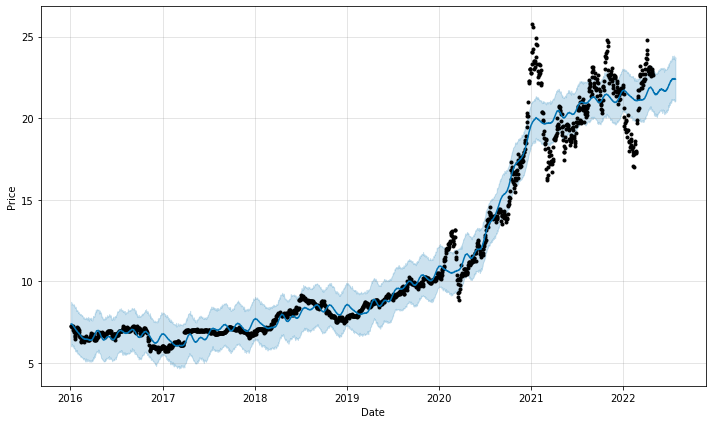

In [89]:
model.plot(preds_EDP, xlabel = 'Date', ylabel = 'Price');

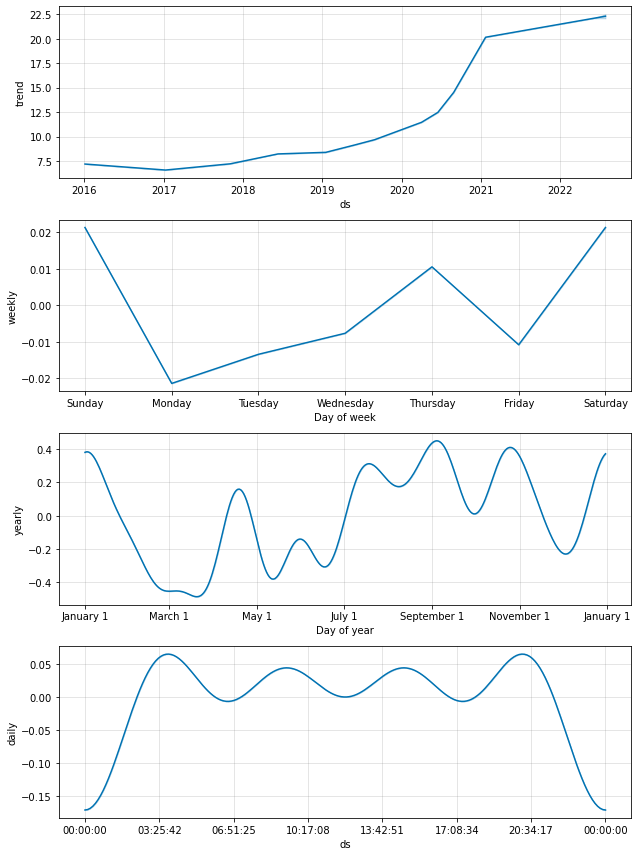

In [90]:
model.plot_components(preds_EDP);#shows the trend over the years, over one year and weekly 

In [91]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [92]:
plot_plotly(model, preds_EDP)

In [93]:
plot_components_plotly(model, preds_EDP)#shows the trend over the years, over one year and weekly 

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [94]:
dataset_VWS = pd.read_csv('VWS_df.csv')


In [95]:
dataset_VWS = dataset_VWS[['Unnamed: 0', 'Close']].rename(columns = {'Unnamed: 0': 'ds', 'Close': 'y'})
dataset_VWS

ds           y
0     2016-01-04   95.040001
1     2016-01-05   95.040001
2     2016-01-06   93.940002
3     2016-01-07   91.860001
4     2016-01-08   89.800003
...          ...         ...
1645  2022-04-25  189.679993
1646  2022-04-26  177.880005
1647  2022-04-27  179.559998
1648  2022-04-28  177.199997
1649  2022-04-29  182.820007

[1650 rows x 2 columns]

In [96]:
model = Prophet(daily_seasonality=True)
model.fit(dataset_VWS)

In [97]:
future_VWS = model.make_future_dataframe(periods=90) # With this line of code the model will make predictions for the next 90 days
preds_VWS = model.predict(future_VWS)

In [98]:
preds_VWS.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2016-01-04  93.066326   74.988955  107.179118    93.066326    93.066326   
1 2016-01-05  93.101961   75.744228  107.718039    93.101961    93.101961   
2 2016-01-06  93.137596   76.193159  106.625337    93.137596    93.137596   
3 2016-01-07  93.173231   75.393280  106.098854    93.173231    93.173231   
4 2016-01-08  93.208866   76.250698  107.749050    93.208866    93.208866   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  ...  \
0       -1.699020             -1.699020             -1.699020 -4.337146  ...   
1       -1.553916             -1.553916             -1.553916 -4.337146  ...   
2       -1.564257             -1.564257             -1.564257 -4.337146  ...   
3       -1.598186             -1.598186             -1.598186 -4.337146  ...   
4       -1.986971             -1.986971             -1.986971 -4.337146  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0 -0.301987     -0.301987     -0.301987  2.940112      2.940112      2.940112   
1 -0.166180     -0.166180     -0.166180  2.949410      2.949410      2.949410   
2 -0.143690     -0.143690     -0.143690  2.916578      2.916578      2.916578   
3 -0.101614     -0.101614     -0.101614  2.840573      2.840573      2.840573   
4 -0.370816     -0.370816     -0.370816  2.720991      2.720991      2.720991   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  91.367305  
1                         0.0  91.548045  
2                         0.0  91.573339  
3                         0.0  91.575044  
4                         0.0  91.221895  

[5 rows x 22 columns]

In [99]:
preds_VWS.tail(90)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1650 2022-04-30  194.063936  170.910954  202.061135   194.063936   194.063936   
1651 2022-05-01  193.893525  172.327639  202.367804   193.893525   193.893525   
1652 2022-05-02  193.723113  170.516793  200.462049   193.723113   193.723113   
1653 2022-05-03  193.552701  170.626758  200.049309   193.552701   193.552701   
1654 2022-05-04  193.382289  168.649189  200.733371   193.382289   193.382289   
...         ...         ...         ...         ...          ...          ...   
1735 2022-07-24  179.578926  160.404897  193.294392   175.011313   183.682225   
1736 2022-07-25  179.408514  158.648837  191.435299   174.787241   183.606436   
1737 2022-07-26  179.238102  159.721645  190.568508   174.553222   183.555792   
1738 2022-07-27  179.067690  158.640345  192.616163   174.349620   183.503315   
1739 2022-07-28  178.897278  157.981782  191.349214   174.137003   183.429195   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
1650       -6.419519             -6.419519             -6.419519 -4.337146   
1651       -6.695142             -6.695142             -6.695142 -4.337146   
1652       -7.799099             -7.799099             -7.799099 -4.337146   
1653       -7.903880             -7.903880             -7.903880 -4.337146   
1654       -8.099728             -8.099728             -8.099728 -4.337146   
...              ...                   ...                   ...       ...   
1735       -2.978156             -2.978156             -2.978156 -4.337146   
1736       -3.838675             -3.838675             -3.838675 -4.337146   
1737       -3.709174             -3.709174             -3.709174 -4.337146   
1738       -3.680608             -3.680608             -3.680608 -4.337146   
1739       -3.618062             -3.618062             -3.618062 -4.337146   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
1650  ...  0.542143      0.542143      0.542143 -2.624517     -2.624517   
1651  ...  0.542143      0.542143      0.542143 -2.900139     -2.900139   
1652  ... -0.301987     -0.301987     -0.301987 -3.159967     -3.159967   
1653  ... -0.166180     -0.166180     -0.166180 -3.400554     -3.400554   
1654  ... -0.143690     -0.143690     -0.143690 -3.618893     -3.618893   
...   ...       ...           ...           ...       ...           ...   
1735  ...  0.542143      0.542143      0.542143  0.816847      0.816847   
1736  ... -0.301987     -0.301987     -0.301987  0.800457      0.800457   
1737  ... -0.166180     -0.166180     -0.166180  0.794152      0.794152   
1738  ... -0.143690     -0.143690     -0.143690  0.800228      0.800228   
1739  ... -0.101614     -0.101614     -0.101614  0.820697      0.820697   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1650     -2.624517                   0.0                         0.0   
1651     -2.900139                   0.0                         0.0   
1652     -3.159967                   0.0                         0.0   
1653     -3.400554                   0.0                         0.0   
1654     -3.618893                   0.0                         0.0   
...            ...                   ...                         ...   
1735      0.816847                   0.0                         0.0   
1736      0.800457                   0.0                         0.0   
1737      0.794152                   0.0                         0.0   
1738      0.800228                   0.0                         0.0   
1739      0.820697                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
1650                         0.0  187.644417  
1651                         0.0  187.198383  
1652                         0.0  185.924013  
1653                         0.0  185.648821  
1654                         0.0  185.282561  
...                          ...         ...  
1735    

### PREDICTIONS GRAPH

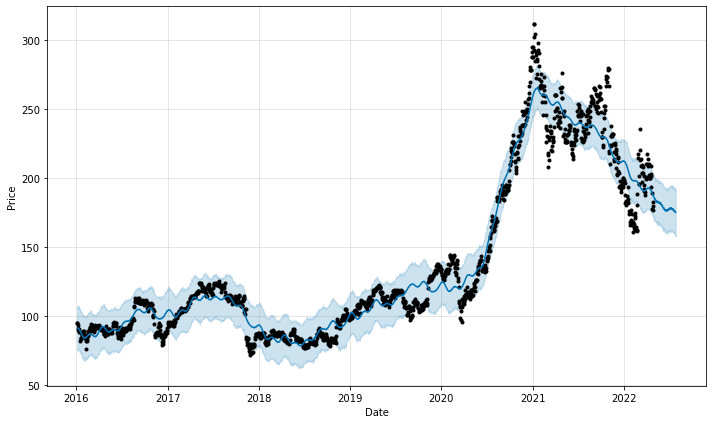

In [100]:
model.plot(preds_VWS, xlabel = 'Date', ylabel = 'Price');

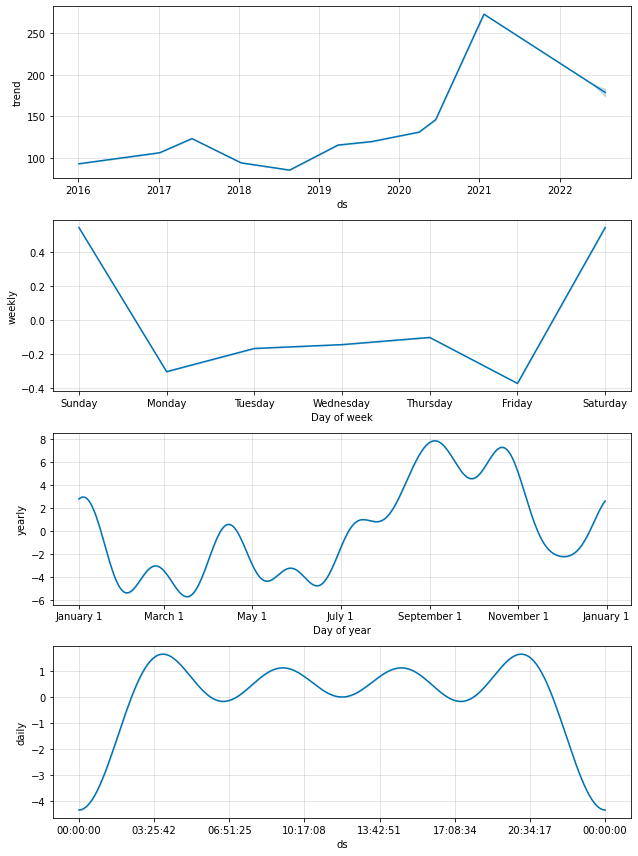

In [101]:
model.plot_components(preds_VWS);#shows the trend over the years, over one year and weekly 

In [102]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [103]:
plot_plotly(model, preds_VWS)

In [104]:
plot_components_plotly(model, preds_VWS)#shows the trend over the years, over one year and weekly 

## NEURAL NETWORK FOR STOCK PRICE PREDICTION USING LSTM

In [56]:
#pip3 install torch==1.4.0 torchvision==0.5.0 -f https://download.pytorch.org/whl/cu101/torch_stable.html 


In [31]:
import torch
from torch import nn, optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [32]:
base_EDP = pd.read_csv('EDPR.csv')

In [33]:
base_EDP.head()

Date   High    Low   Open  Close    Volume  Adj Close
0  2016-01-04  7.267  7.120  7.133  7.267  628745.0   6.939563
1  2016-01-05  7.344  7.192  7.250  7.240  623709.0   6.913780
2  2016-01-06  7.250  7.136  7.240  7.238  345564.0   6.911870
3  2016-01-07  7.240  7.078  7.125  7.233  684252.0   6.907095
4  2016-01-08  7.299  7.171  7.233  7.194  447045.0   6.869852

In [34]:
base_EDP.tail()

Date       High        Low       Open      Close    Volume  \
1615  2022-04-25  23.400000  22.379999  22.500000  23.000000  481770.0   
1616  2022-04-26  23.340000  22.530001  22.670000  22.760000  691940.0   
1617  2022-04-27  22.900000  22.400000  22.840000  22.790001  508110.0   
1618  2022-04-28  23.120001  22.600000  22.719999  22.870001  550210.0   
1619  2022-04-29  23.190001  22.360001  23.129999  22.639999  549943.0   

      Adj Close  
1615  22.909052  
1616  22.670000  
1617  22.790001  
1618  22.870001  
1619  22.639999

In [35]:
base_EDP_training = base_EDP.iloc[:, 1:2].values

In [36]:
base_EDP_training 

array([[ 7.2670002 ],
       [ 7.34399986],
       [ 7.25      ],
       ...,
       [22.89999962],
       [23.12000084],
       [23.19000053]])

In [37]:
normalizer = MinMaxScaler(feature_range=(0,1))
base_EDP_training_normalized = normalizer.fit_transform(base_EDP_training)

In [38]:
base_EDP_training_normalized

array([[0.07305849],
       [0.07678892],
       [0.07223488],
       ...,
       [0.83043457],
       [0.84109303],
       [0.84448432]])

In [39]:
X = []
y = []
for i in range(90, 1242):
  X.append(base_EDP_training_normalized[i-90:i, 0])
  y.append(base_EDP_training_normalized[i, 0])
X, y = np.array(X), np.array(y)

In [40]:
X[0]

array([0.07305849, 0.07678892, 0.07223488, 0.0717504 , 0.07460879,
       0.06932805, 0.07262245, 0.07833923, 0.07121749, 0.0667119 ,
       0.05929945, 0.05193547, 0.04486217, 0.04059882, 0.05329201,
       0.05634418, 0.06588829, 0.06923116, 0.0717504 , 0.06884356,
       0.07339762, 0.06739016, 0.06254544, 0.0630299 , 0.05285597,
       0.04757523, 0.04655782, 0.0461218 , 0.03793421, 0.02805097,
       0.0337193 , 0.03352553, 0.03938764, 0.03783732, 0.03294416,
       0.03565719, 0.03589943, 0.03560875, 0.0329926 , 0.03827334,
       0.0417131 , 0.04345721, 0.04471684, 0.04142241, 0.04200378,
       0.03778888, 0.03347706, 0.03308949, 0.03837025, 0.03904851,
       0.0400659 , 0.03633545, 0.03304104, 0.03541495, 0.04505597,
       0.04864106, 0.05232307, 0.05552059, 0.05309821, 0.04999758,
       0.05048207, 0.04752677, 0.04442616, 0.04253671, 0.04074415,
       0.03531806, 0.03260503, 0.03541495, 0.03643236, 0.03604476,
       0.03778888, 0.03807956, 0.03933919, 0.04016278, 0.04529

In [41]:
y[0]

0.05033671065846218

In [42]:
X[1]

array([0.07678892, 0.07223488, 0.0717504 , 0.07460879, 0.06932805,
       0.07262245, 0.07833923, 0.07121749, 0.0667119 , 0.05929945,
       0.05193547, 0.04486217, 0.04059882, 0.05329201, 0.05634418,
       0.06588829, 0.06923116, 0.0717504 , 0.06884356, 0.07339762,
       0.06739016, 0.06254544, 0.0630299 , 0.05285597, 0.04757523,
       0.04655782, 0.0461218 , 0.03793421, 0.02805097, 0.0337193 ,
       0.03352553, 0.03938764, 0.03783732, 0.03294416, 0.03565719,
       0.03589943, 0.03560875, 0.0329926 , 0.03827334, 0.0417131 ,
       0.04345721, 0.04471684, 0.04142241, 0.04200378, 0.03778888,
       0.03347706, 0.03308949, 0.03837025, 0.03904851, 0.0400659 ,
       0.03633545, 0.03304104, 0.03541495, 0.04505597, 0.04864106,
       0.05232307, 0.05552059, 0.05309821, 0.04999758, 0.05048207,
       0.04752677, 0.04442616, 0.04253671, 0.04074415, 0.03531806,
       0.03260503, 0.03541495, 0.03643236, 0.03604476, 0.03778888,
       0.03807956, 0.03933919, 0.04016278, 0.04529819, 0.04951

In [43]:
y[1]

0.047332989984086304

In [44]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [45]:
dataset = torch.utils.data.TensorDataset(X, y)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [46]:
class regressor_LSTM_EDP(nn.Module):
  def __init__(self):
    super().__init__()

    self.lstm1_EDP = nn.LSTM(input_size=1, hidden_size=100)
    self.lstm2_EDP = nn.LSTM(100, 50)
    self.lstm3_EDP = nn.LSTM(50, 50, dropout = 0.3, num_layers=2)
    self.dropout = nn.Dropout(p = 0.3)
    self.linear = nn.Linear(in_features=50, out_features=1)

  def forward(self, X):
    # (batch_size, timesteps) -> (timesteps, batch_size, dimensions)
    X = X.permute(1, 0).unsqueeze(2)
    X, _ = self.lstm1_EDP(X)
    X = self.dropout(X)
    X, _ = self.lstm2_EDP(X)
    X = self.dropout(X)
    X, _ = self.lstm3_EDP(X)

    X = X[-1]
    X = self.dropout(X)
    X = self.linear(X)

    return X

In [47]:
device_pc = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device_pc

device(type='cuda')

In [48]:
regressor_EDP = regressor_LSTM_EDP()
criterion = nn.MSELoss()

optimizer_EDP = optim.RMSprop(regressor_EDP.parameters(), lr = 1e-3, alpha = 0.9)

In [49]:
regressor_EDP.to(device_pc)

AssertionError: Torch not compiled with CUDA enabled

## Complementary Reading

Reference: Efstathopoulos g. (2020) Python for Finance, Part I: Yahoo & Google Finance API, pandas, and matplotlib 
Available at: URL <a href="https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ ">https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ </a>(Accessed 14 October 2021).  

Reference: Witham, J. (2020) The Imperative For A 24/7 Renewable Energy World, Forbes. 
Available at: URL <a href="https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo">https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo/ </a>(Accessed 14 October 2021).  

Reference: Norris, E. (2021) "Why Did My Stock's Ticker Change?", Investopedia. 
Available at: URL <a href="https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/">https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/ </a>(Accessed 14 October 2021).  

Reference: Mahgoub, A. (2021) "Stock Prediction using Regression Algorithm in Python", Medium. 
Available at: URL <a href="https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9/">https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9</a>(Accessed 25 Feb 2022). 

Reference: Prabhakaran, S. (2019) "Augmented Dickey Fuller Test (ADF Test) – Must Read Guide", Medium. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.">https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.</a>

Reference: Masum, M. (2020) "Time Series Analysis: Identifying AR and MA using ACF and PACF Plots", Medium. 
Available at: URL <a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8</a> (Accessed 21 March 2022).  

Reference: Zvornicanin E. (2021) "Choosing the best q and p from ACF and PACF plots in ARMA-type modeling", Baeldung. 
Available at: URL <a href="https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling">https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling</a> (Accessed 21 March 2022). 


Reference: Prabhakaran S. (2021) "ARIMA Model – Complete Guide to Time Series Forecasting in Python", Machinelearningplus. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/">https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/</a> (Accessed 21 March 2022). 

Reference: Daitan (2019) "A Visual Guide to Time Series Decomposition Analysis", Betterprogramming 
Available at: URL <a href="https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930">https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930</a> (Accessed 14 April 2022).

Reference: Zach (2021) "Augmented Dickey-Fuller Test in Python (With Example)", Statology.org 
Available at: URL <a href="https://www.statology.org/dickey-fuller-test-python/">https://www.statology.org/dickey-fuller-test-python/</a> (Accessed 14 April 2022).

Reference: Shao, V.(2020) "Forecasting with a Time Series Model using Python: Part One", Bounteous
Available at: URL <a href="https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/">https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/</a> (Accessed 15 April 2022).


- https://github.com/lxu213/arima-forecasting/blob/master/arima-ts-forecasting.ipynb

-  https://pierpaolo28.github.io/blog/blog5/